**Exercise 1**
In this exercise you will write a simple simulation of the process of evolution by natural selection, on the way learning the basics of genetic algorithms. The exercise might feel complex at the beginning, but worry not - we will go step by step, and every small part of the exercise will be simple enough for you to solve it. All exercises require you to use random matrix generation, `for` loops and indexing.

In our simulation we will have a set of 1000 animals. Every animal will be represented as its genetic sequence - a sequence of 25 genes. The whole population will be represented in a matrix with 1000 rows (1000 animals) and 25 columns (each column is one gene). You will iterate over 100 generations, and in every generation you will:
1. Introduce random mutations in the genome 
2. Calculate fitness of each animal 
3. You will simulate reproduction, in which animals will pair with others, selected on the basis of their fitness.
4. You will update new generation, and start again.

In every generation, you will calculate the mean fitness, and plot it at the end of the exercise to see the effects of evolution!


# **1. Loading and exploring data**

**1a. Load genom array (genom_array_mut.csv) - it will represent a population composed of 1000 agents, each with a sequence of 25 genes - it will be a 1000x25 matrix. The data is in csv file - google the Numpy function that will load it and store as a Numpy array**



In [ ]:
import numpy as np



**1b. Import matplotlib and use `pyplot.matshow()` to plot the genome of the first 10 animals**




**1c. Find all values that can be taken by genes (all unique values of the array)** 

***Values stored in genom array represent different alleles of each gene - positive values give the animal an advantage, while negative values represents rare but severe deleterious mutations*** 

# **2. Calculating the fitness of animals**



### First some intro to mathematical operations on arrays:

**Numpy allows us to perform mathematical operations on arrays of the same size** - eg. adding two arrays will result in a new array in which each cell will contain a sum of corresponding cells in added arrays

[[0.01574704 0.69254853 0.48726052 0.72925386 0.91505574]
 [0.29271479 0.49276264 0.69254937 0.83843253 0.03833248]
 [0.22065985 0.66406855 0.49059819 0.48826659 0.90106581]
 [0.16736593 0.41850916 0.06903637 0.99210245 0.64570839]
 [0.97734269 0.65609178 0.75467166 0.15161292 0.65930368]
 [0.1276877  0.82723345 0.1496855  0.07033168 0.80036777]
 [0.38882069 0.28569722 0.1924522  0.16654757 0.11909694]
 [0.59958006 0.7502339  0.68126249 0.69429611 0.25068738]
 [0.14622473 0.45757691 0.74193183 0.09287919 0.79479281]]


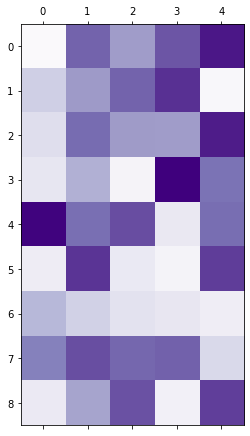

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

a = np.random.uniform(0, 1, (9, 5))
print(a)
b = np.ones((9, 5))
c = a + b
plt.matshow(a, vmin = 0, cmap = 'Purples')

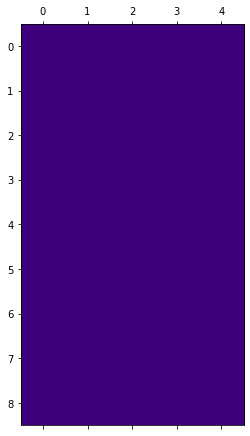

In [ ]:
plt.matshow(b, vmin = 0, cmap = 'Purples')

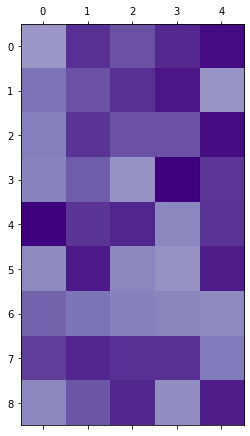

In [ ]:
plt.matshow(c,  vmin = 0, cmap = 'Purples')


If we want to perform an operation on an array and an object that has smaller shape Numpy will allow it with some restrictions. It will resize the smaller object to fit the larger array - this operation is called **broadcasting**

*   **Array and a scalar**






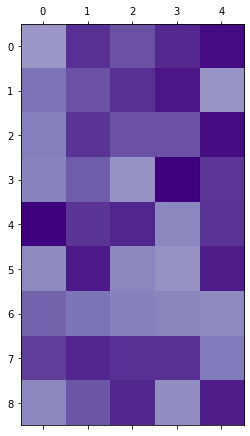

In [ ]:
d = a + 1
plt.matshow(d, vmin = 0, cmap = 'Purples')

This is what Numpy actually did here:

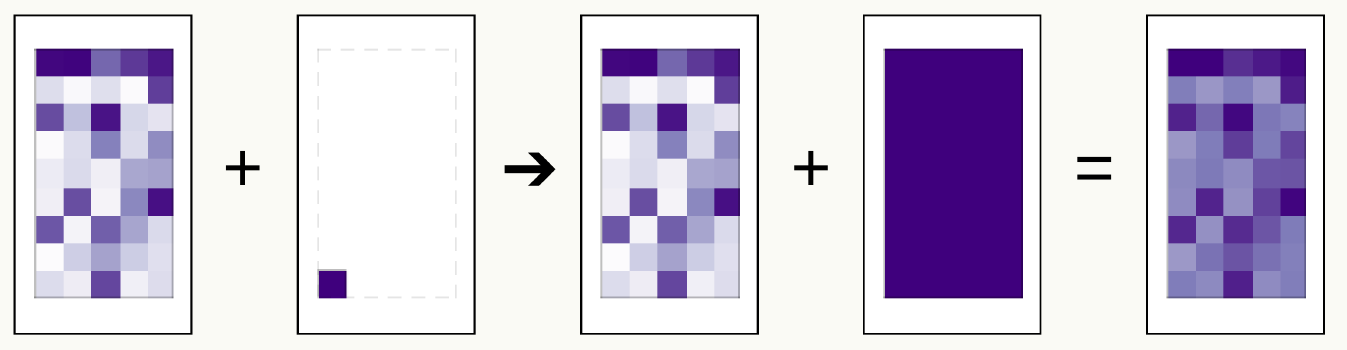





*   **2D array and 1D array**






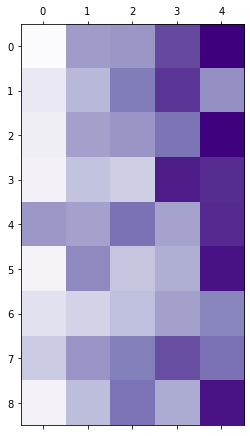

In [ ]:
e = np.linspace(0, 1, 5)
f = a + e
plt.matshow(f, vmin = 0, cmap = 'Purples')

Now this is what happened:

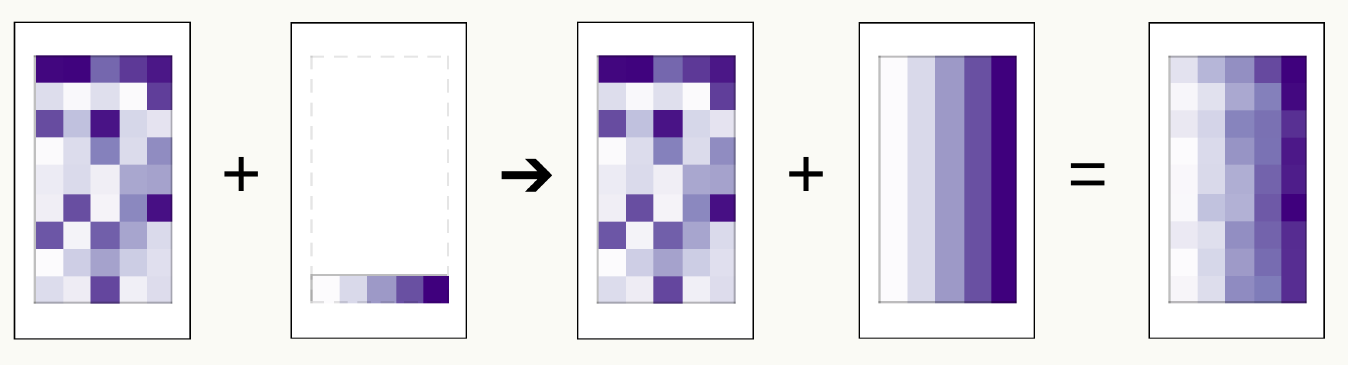

*   **2D array and a column**

*Importantly if you want to add 9x5 array and an 1D array with length of 9 you will have to reshape the smaller array into 2D 9x1 column*

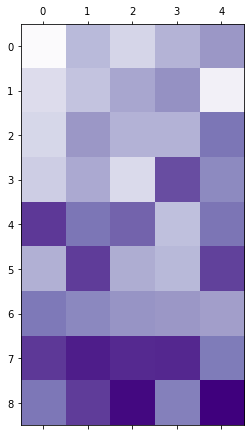

In [ ]:
import numpy as np
g = np.linspace(0, 1, 9).reshape(9, 1)
h = a + g
plt.matshow(h, vmin = 0, cmap = 'Purples')
# you might also see np.newaxis used:
# g_prime = np.linspace(0, 1, 9)[:, np.newaxis]  # This order will make the original array the rows of the new 2D array, if you need it to be columns
# switch to [np.newaxis, :]


Now this is what happened:

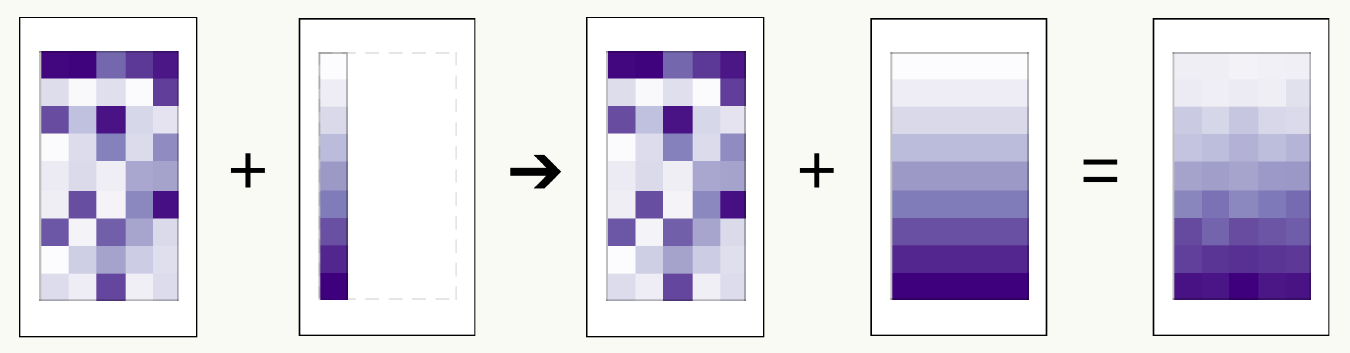

So the **rule of thumb** when you are broadcasting - the compability of array sizes is checked from the last dimension. Lacking dimensions are assumed to be the firsts. That means that you can broadcast arrays:

3D array with size 2x3x6 and 1D array with size of 6

3D array with size 2x3x6 and 2D array with size of 3x1

3D array with size 2x3x6 and 3D array with size of 2x1x1


### Back to genome

**2a. Import 1D expression array (express_array). It has 25 columns and contains values between 0 and 1 - they indicate the contribution of particular gene to the general fitness of an animal**



**2b. Write a function that will calculate the overall fitness of each animal. First it should multiply values stored in our genom array by weights provided in expression array. Then it should sum results for every row (animal) and return the outcome as 1D fitness array, where each index will be an index of a given animal.**

**2c. Explore statistics of our sample - calculate the mean and SD of animals' fitness (google appropriate functions)**

**2d.  Let's assume that animals with fitness < 8 are not capable of reproducing. Using boolean indexing (see explanation below) to see whether we have such animals in our sample. Then - using `np.where()` function - to set their fitness to zero.**


*   ***Boolean indexing***

If you pass an array of booleans as index, Numpy will return the values at the `True` positions. You can create the array of booleans just by typing the logical expression like `array == 10` or `array < 7`

*   **`where()`** ***function***

There is one very useful function that allows us to modify content of arrays depending on what it is. It is something like `if` statement nested in a `for` loop - it checks the condition for each value and make modifications depending on wether the condition is fulfilled or not. But in Numpy we can do it in one line!

`np.where(xx,yy,zz)` where xx, yy and zz have the same size and:

xx - boolean array 

yy - array from which to take values if `True`

zz - array from which to take values if `False`

**2e. Write a function that will calculate the chance of each animal to reproduce. It should take two arguments: fitness array and minimal fitness level that allows animal to reproduce, and return an array containing the probability of each animal to reproduce. The function should first filter down animals with too low fitness (set fitness values that are lower than a minimal value to 0 - see previous point). Further it should calculate the array of the proportional fitness of all animals (fitness of each animal divided by the sum of all values for all animals). Values in proportional-fitness array should add up to one, as they will be representing the probability of a given animal to reproduce.**


# **3. Mutations and reproduction**

**3a. Write a function that will produce an offspring of two animals. It should take the genome array and indexes of two parent animals and return the sequence (single row) of an offspring. Creating offsprings sequence should imitate the crossing-over process. Function should randomly select a crossing over point (e.g. 5th element of a sequence) and then swap sequences between animals - like on an image.** 

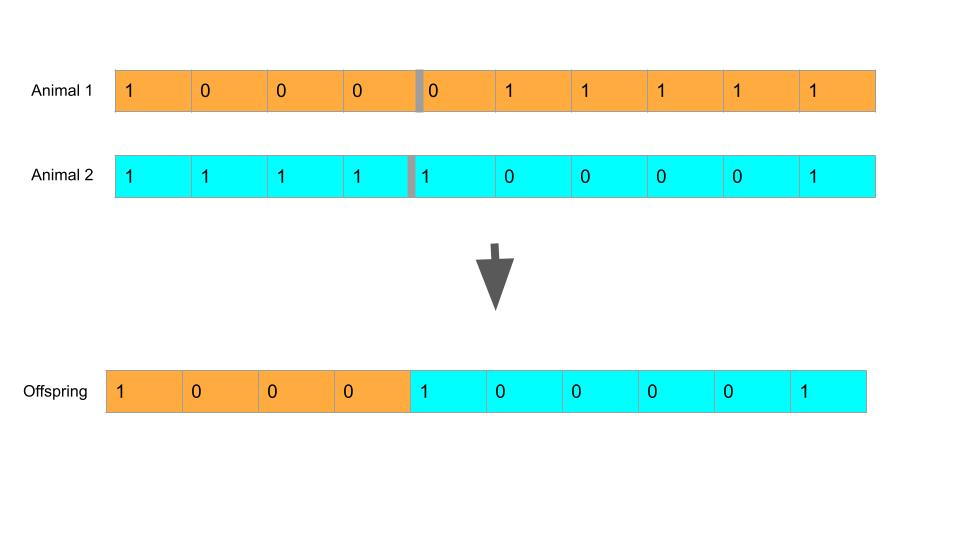

**3b. Write a function that creates the new generation of animals. It should select pairs of animals and reproduce them. Pairing and reproduction should be done as many times as it is needed to keep the size of the population constant between generations (1000 animals. Each animal should be selected for reproduction with the probability provided by proportional fitness array. Each animal can be selected many times, but each pair must contain two different animals. To simulate the process of reproduction use the function that you have already written. The new generation should be represented in the same format as original genome array**

**3a. Write a function that will take genome array, introduce random mutations in sequences and return modified genome array. The function should take two additional arguments - the probability of ordinary mutation, and the probability of deleterious mutation. Use a `for` loop to generate random mutations in all sequences in our genome array (with ordinary mutation probalility eg. 0.02) - it will result in swapping neutral for advantageus or advantageus for neutral alles of each gene. In a similar way deleterious mutation can occur (changing values to negative one), but this will happen less often (eg. with probability of 0.0001). You can also think about how to do it in a clever way, without using a `for` loop!**


# 4. Simulating population over generations

**4a. Write the function that will use the previous functions to simulate the population through one generation. The generation should first overcome mutations (with given probabilities), then its fitness should be calculated (with given minimal fitness value) and finally it should reproduce to create a new generation. Reproduction should occur as many times as it is needed to keep the size of the population constant between generations. As an outcome of this function we want to get the mean fitness of old generation and the array representing the genome of the new generation**

**4b. Now put the function from 4a. in a for loop for 100 generations! Store the mean fitness of each generation in an array (one cell for each generation). Use `plt.plot()` to plot how the fitness changed across generations. Play with minimal fitness value and mutation probabilities - how does it change our simulation?**